# Exploratory Data Analysis (EDA) of IPL Dataset

In [1]:
#Import Libraries:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
#Import Dataset:
ipl = pd.read_csv('C:/Users/Dell/Jupyter4KN/Dataset/IPL_Data.csv')
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen,NaN
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri,NaN
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar,NaN
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper,NaN
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan,NaN


# Exploring Dataset

In [3]:
# Dataset Size:
ipl.shape

(577, 18)

In [4]:
#Looking for Null Values:
ipl.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              0
umpire2              0
umpire3            577
dtype: int64

##### In the dataset we have 577 rows and we can observe that umpire3 column has all null values, city column has 7, winner column and player_of_match column has 3 null values

In [5]:
# Removing column umpire3:
ipl.drop('umpire3', axis = 1, inplace = True)
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


In [6]:
ipl.shape

(577, 17)

In [7]:
#Looking for most matches played city 
ipl['city'].value_counts().head(3)

Mumbai       77
Bangalore    58
Kolkata      54
Name: city, dtype: int64

##### As most matches are played in Mumbai, we'll fill Nan in city column with Mumbai

In [8]:
ipl['city'].fillna('Mumbai', inplace=True)

In [9]:
ipl['result'].value_counts()

normal       568
tie            6
no result      3
Name: result, dtype: int64

###### In Result column there are 3 'no result' values which means the match has not been played, therefore filling nan in winner and player_of_match column with 'No Match'

In [10]:
ipl['winner'].fillna('No Match', inplace=True)

In [11]:
ipl['player_of_match'].fillna('No Match', inplace=True)

In [12]:
#Rechecking if any value:
ipl.isnull().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
dtype: int64

# We have Explored, Cleaned and Transformed the data, now we can find insights and visualyse it:

### 1) Analyzing Number of Matches / Season:

In [13]:
ipl['season'].value_counts()

2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2015    59
2008    58
2009    57
Name: season, dtype: int64

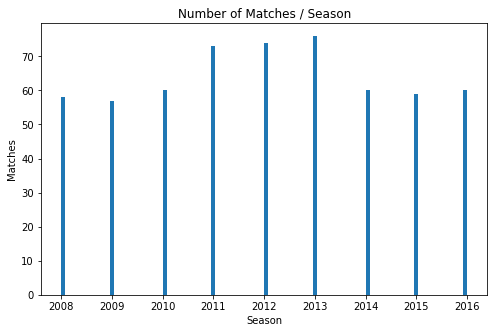

In [14]:
plt.figure(figsize = (8,5))
plt.hist(ipl['season'], bins = 100) #bins = len(ipl.season)
plt.title('Number of Matches / Season')
plt.xlabel('Season')
plt.ylabel('Matches')
plt.show()

##### Finding => We have IPL match dataset for the season 2008 - 2016 with most matches played in 2013

### 2) Analyzing if there's any relation between winning a toss and winning a match:

In [15]:
np.sum(ipl['toss_winner']==ipl['winner'])

291

In [16]:
(291/577)*100

50.43327556325823

##### Finding => Out of 577 total matches only 291 matches are won by toss winning team. The calculation suggests a winning percentage of 50.43% for the toss-winning team. Based on this analysis, there might not be a strong relationship between winning the toss and winning the match. This suggests a lack of a clear advantage from winning the toss.

### 3) Analyzing top 5 Man of the Match winning player:

In [17]:
categorical_value = ipl['player_of_match'].value_counts()[0:5].keys()
categorical_value

Index(['CH Gayle', 'YK Pathan', 'AB de Villiers', 'DA Warner', 'SK Raina'], dtype='object')

In [18]:
numerical_value = ipl['player_of_match'].value_counts()[0:5]
numerical_value

CH Gayle          17
YK Pathan         16
AB de Villiers    15
DA Warner         14
SK Raina          13
Name: player_of_match, dtype: int64

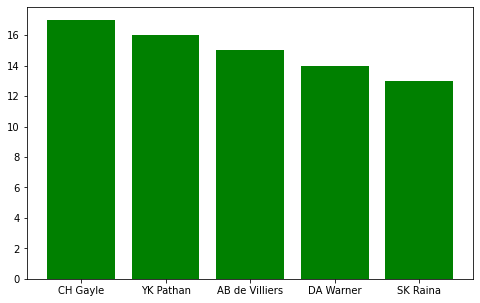

In [19]:
plt.figure(figsize = (8,5))
plt.bar(list(categorical_value), list(numerical_value), color = 'g')
plt.show()

##### Finding => CH Gayle with 17 Man of the Match is at Highest

## 4) Analyzing teams who bat first:

### 4.1) Sorting teams who bat first:

In [20]:
b_f = ipl['win_by_runs'] != 0
b_f.head(3)

0     True
1     True
2    False
Name: win_by_runs, dtype: bool

In [21]:
bat_first = ipl[ipl['win_by_runs'] != 0]
bat_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
7,8,2008,Chennai,2008-04-23,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,normal,0,Chennai Super Kings,6,0,ML Hayden,"MA Chidambaram Stadium, Chepauk",DJ Harper,GA Pratapkumar
9,10,2008,Chandigarh,2008-04-25,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,normal,0,Kings XI Punjab,66,0,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,AM Saheba
14,15,2008,Bangalore,2008-04-28,Chennai Super Kings,Royal Challengers Bangalore,Chennai Super Kings,bat,normal,0,Chennai Super Kings,13,0,MS Dhoni,M Chinnaswamy Stadium,BR Doctrove,RB Tiffin


In [22]:
bat_first['id'].value_counts().sum()

261

In [23]:
(261/577)*100

45.233968804159446

##### There are 261 matches being played out of total 577 matches where team bat_first and won. Which is 45.23%

### 4.2) Analyzing distribustion of win by runs after batting first:

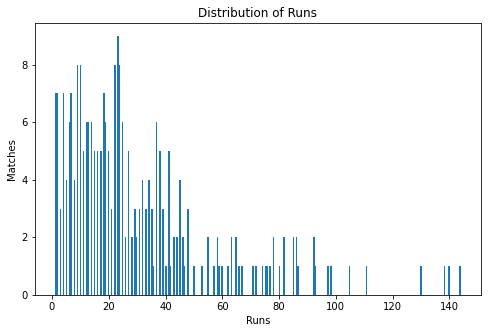

In [24]:
plt.figure(figsize = (8,5))
plt.hist(bat_first['win_by_runs'], bins = 261)
plt.title('Distribution of Runs')
plt.xlabel('Runs')
plt.ylabel('Matches')
plt.show()

##### Finding => According to above histogram we can analyze that most of the matches have been won between 0 to 20 runs, whereas almost 1 match is won by 100+ runs

### 4.3) Analyzing number of wins for each team after batting first:

In [25]:
bat_first['winner'].value_counts()

Chennai Super Kings            46
Mumbai Indians                 43
Kolkata Knight Riders          29
Kings XI Punjab                28
Royal Challengers Bangalore    27
Rajasthan Royals               23
Delhi Daredevils               18
Deccan Chargers                18
Sunrisers Hyderabad            18
Pune Warriors                   6
Rising Pune Supergiants         2
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

In [26]:
#Top 3
categorical_value = bat_first['winner'].value_counts()[0:3].keys()
categorical_value

Index(['Chennai Super Kings', 'Mumbai Indians', 'Kolkata Knight Riders'], dtype='object')

In [27]:
numerical_value = bat_first['winner'].value_counts()[0:3]
numerical_value

Chennai Super Kings      46
Mumbai Indians           43
Kolkata Knight Riders    29
Name: winner, dtype: int64

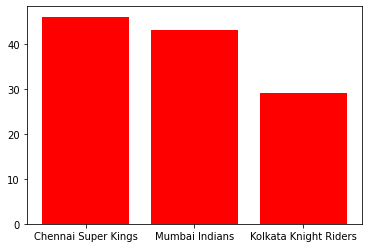

In [28]:
plt.bar(list(categorical_value), list(numerical_value), color = 'r')
plt.show()

##### Finding => Top 3 teams who won after batting first are... CSK, MI and KKR

### 4.4) Analyzing number of wins for each team after batting first in percentage:

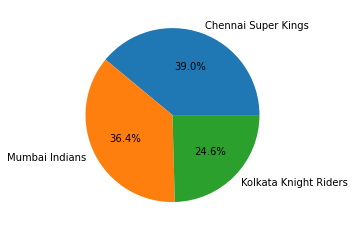

In [29]:
plt.pie(list(numerical_value), labels = list(categorical_value), autopct = '%0.1f%%')
plt.show()

##### Finding => Top 3 teams who won after batting first are... CSK, MI and KKR. CSK being highest at 39% winning rate in top 3

## 5) Analyzing teams who bat first:

### 5.1) Sorting teams who ball first

In [30]:
ball_first = ipl[ipl['win_by_wickets'] != 0]
ball_first.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan
5,6,2008,Jaipur,2008-04-21,Kings XI Punjab,Rajasthan Royals,Kings XI Punjab,bat,normal,0,Rajasthan Royals,0,6,SR Watson,Sawai Mansingh Stadium,Aleem Dar,RB Tiffin
6,7,2008,Hyderabad,2008-04-22,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Delhi Daredevils,0,9,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",IL Howell,AM Saheba


In [31]:
ball_first.shape

(307, 17)

In [32]:
(307/577)*100

53.20623916811091

##### Finding => There are 307 matches being played out of total 577 matches where team ball_first and won. Which is 53.20%

### 5.2) Analyzing distribustion of wickets to match win:

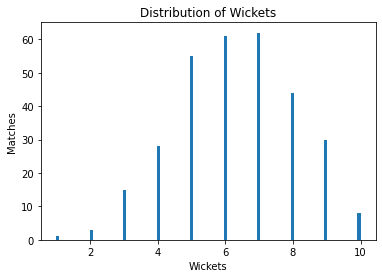

In [33]:
plt.hist(ball_first['win_by_wickets'], bins = 100)
plt.title('Distribution of Wickets')
plt.xlabel('Wickets')
plt.ylabel('Matches')
plt.show()

##### Finding => According to above histogram we can analyze that most of the matches are won by 5 - 7 wickets

### 5.3) Analyzing number of wins for each team:

In [34]:
ball_first['winner'].value_counts()

Royal Challengers Bangalore    42
Kolkata Knight Riders          39
Rajasthan Royals               38
Delhi Daredevils               38
Mumbai Indians                 37
Kings XI Punjab                33
Chennai Super Kings            33
Sunrisers Hyderabad            15
Deccan Chargers                11
Gujarat Lions                   8
Pune Warriors                   6
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

In [35]:
categorical_value = ball_first['winner'].value_counts()[0:3].keys()
categorical_value

Index(['Royal Challengers Bangalore', 'Kolkata Knight Riders',
       'Rajasthan Royals'],
      dtype='object')

In [36]:
numerical_value = ball_first['winner'].value_counts()[0:3]
numerical_value

Royal Challengers Bangalore    42
Kolkata Knight Riders          39
Rajasthan Royals               38
Name: winner, dtype: int64

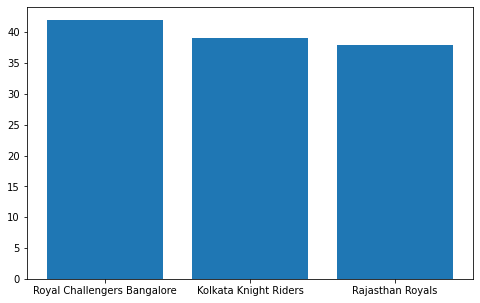

In [37]:
plt.figure(figsize = (8,5))
plt.bar(list(categorical_value), list(numerical_value))
plt.show()

##### Finding => Top 3 teams who won after balling first are... RCB, KKR and DD

### 5.4) Analyzing number of wins for each team after balling first in percentage:

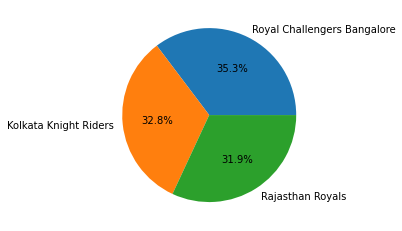

In [38]:
plt.pie(list(numerical_value), labels = list(categorical_value), autopct = '%0.1f%%')
plt.show()

##### Finding => Top 3 teams who won after balling first are... RCB, KKR and DD. RCB being highest at 35.3% winning rate in top 3

## 6) Analyzing Venue

### 6.1) Venue Overview:

Creating a list of all unique venues in the dataset to understand the scope of the analysis and Calculating total number of matches played at each venue

In [39]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2008,Bangalore,2008-04-18,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Kolkata Knight Riders,140,0,BB McCullum,M Chinnaswamy Stadium,Asad Rauf,RE Koertzen
1,2,2008,Chandigarh,2008-04-19,Chennai Super Kings,Kings XI Punjab,Chennai Super Kings,bat,normal,0,Chennai Super Kings,33,0,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",MR Benson,SL Shastri
2,3,2008,Delhi,2008-04-19,Rajasthan Royals,Delhi Daredevils,Rajasthan Royals,bat,normal,0,Delhi Daredevils,0,9,MF Maharoof,Feroz Shah Kotla,Aleem Dar,GA Pratapkumar
3,4,2008,Mumbai,2008-04-20,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,normal,0,Royal Challengers Bangalore,0,5,MV Boucher,Wankhede Stadium,SJ Davis,DJ Harper
4,5,2008,Kolkata,2008-04-20,Deccan Chargers,Kolkata Knight Riders,Deccan Chargers,bat,normal,0,Kolkata Knight Riders,0,5,DJ Hussey,Eden Gardens,BF Bowden,K Hariharan


In [40]:
ipl.shape

(577, 17)

In [41]:
ipl['venue'].value_counts().head()

M Chinnaswamy Stadium              58
Eden Gardens                       54
Feroz Shah Kotla                   53
Wankhede Stadium                   49
MA Chidambaram Stadium, Chepauk    48
Name: venue, dtype: int64

##### Finding => Most matches are being played in M Chinnaswamy Stadium which is in Bangalore, Karnataka

### 6.2: Calculating and visualizing the win-loss records of each team at each venue

In [42]:
#TEAM 1:
# Create a dictionary to store win-loss records
win_loss_records = {}

# Iterate through each row in the DataFrame
for index, row in ipl.iterrows():
    venue = row['venue']
    team1 = row['team1']
    team2 = row['team2']
    winner = row['winner']
    
    # Update win-loss records for team1
    if team1 not in win_loss_records:
        win_loss_records[team1] = {'venue': {}, 'total_matches': 0}
    if venue not in win_loss_records[team1]['venue']:
        win_loss_records[team1]['venue'][venue] = {'wins': 0, 'losses': 0}
    if winner == team1:
        win_loss_records[team1]['venue'][venue]['wins'] += 1
    else:
        win_loss_records[team1]['venue'][venue]['losses'] += 1
    win_loss_records[team1]['total_matches'] += 1

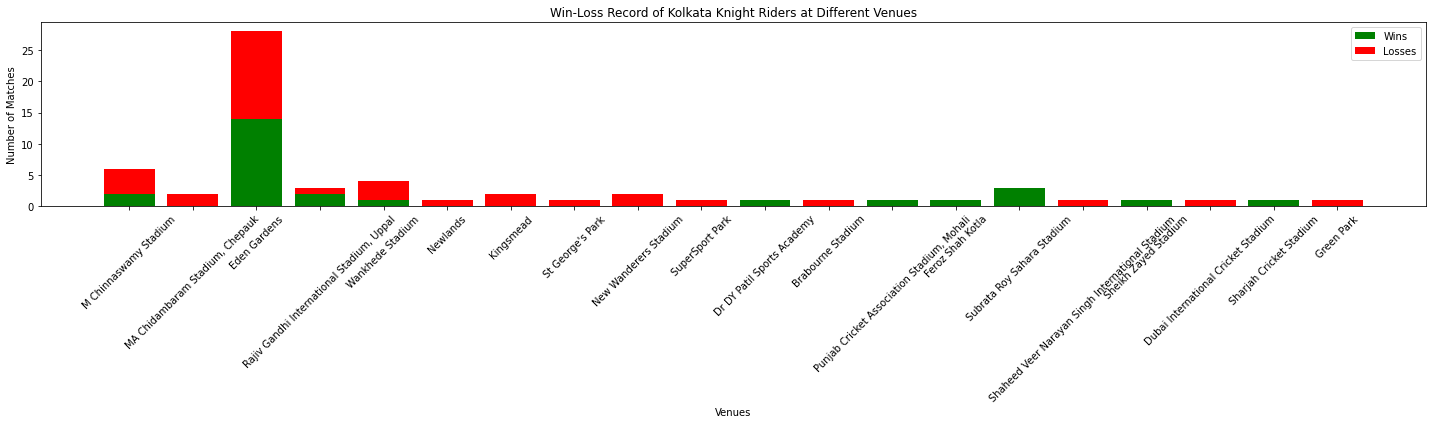

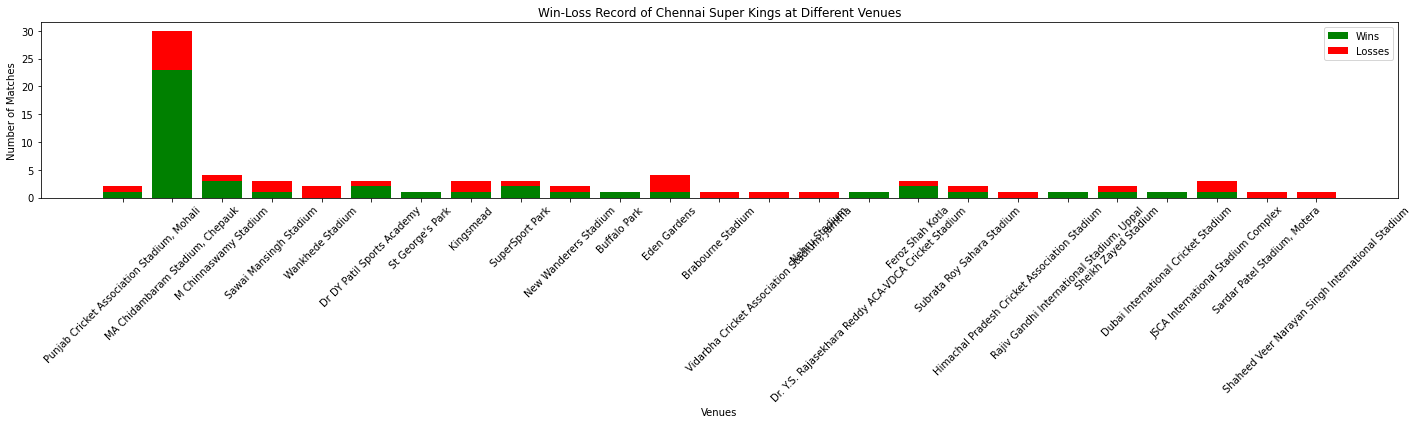

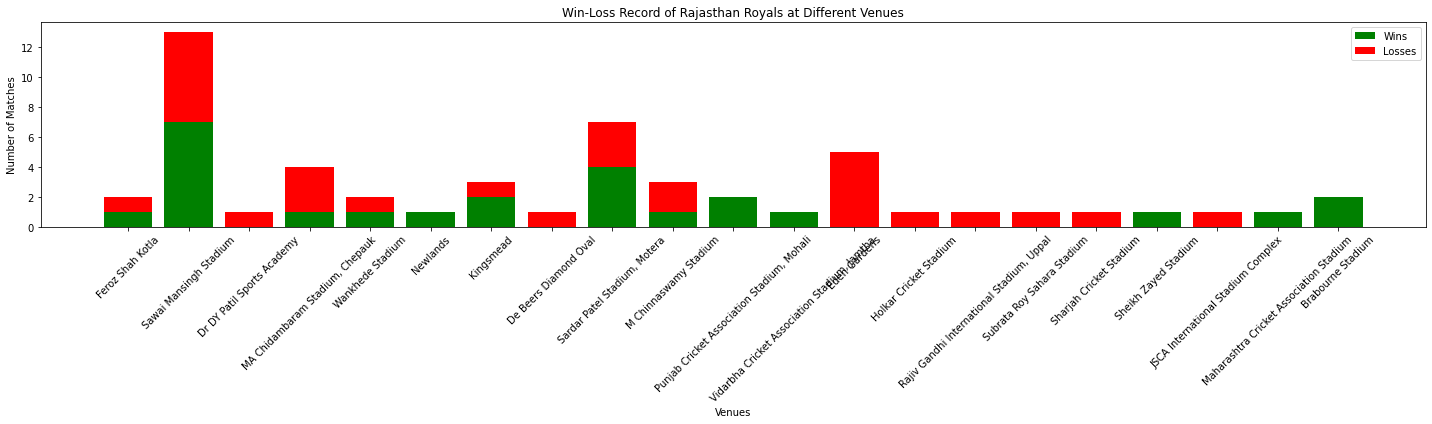

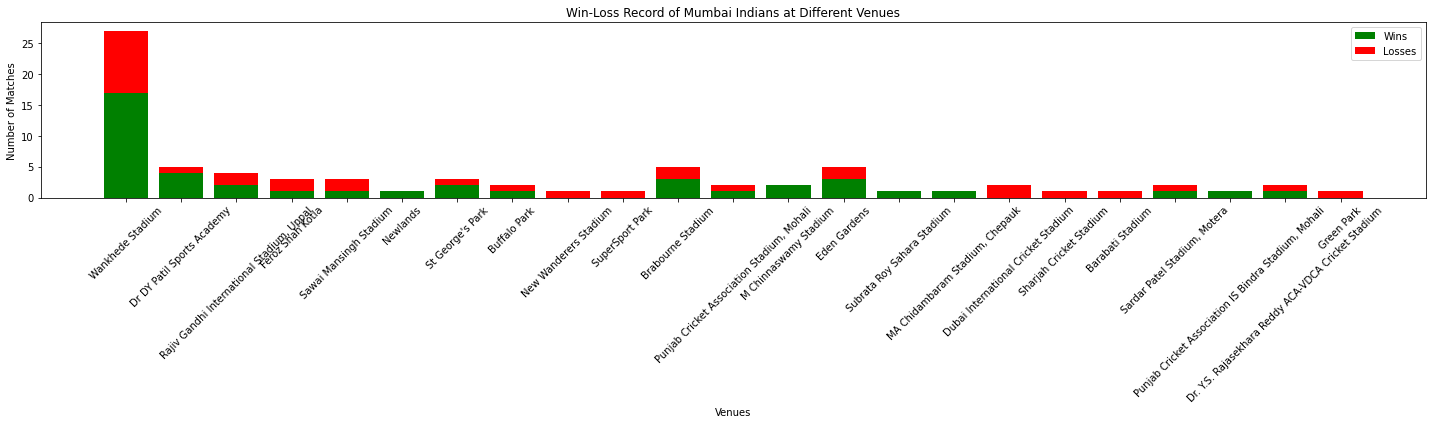

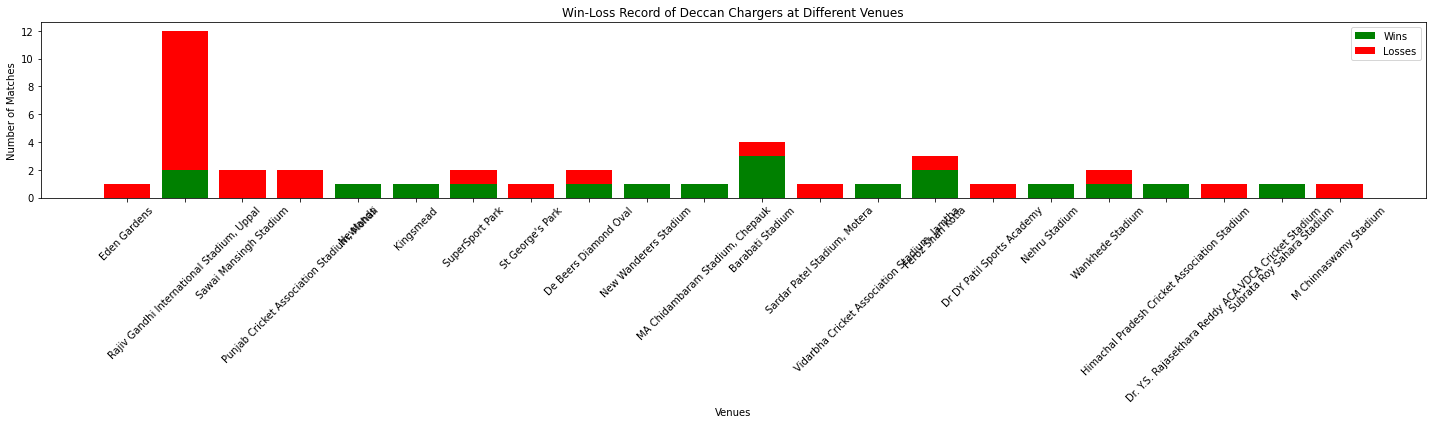

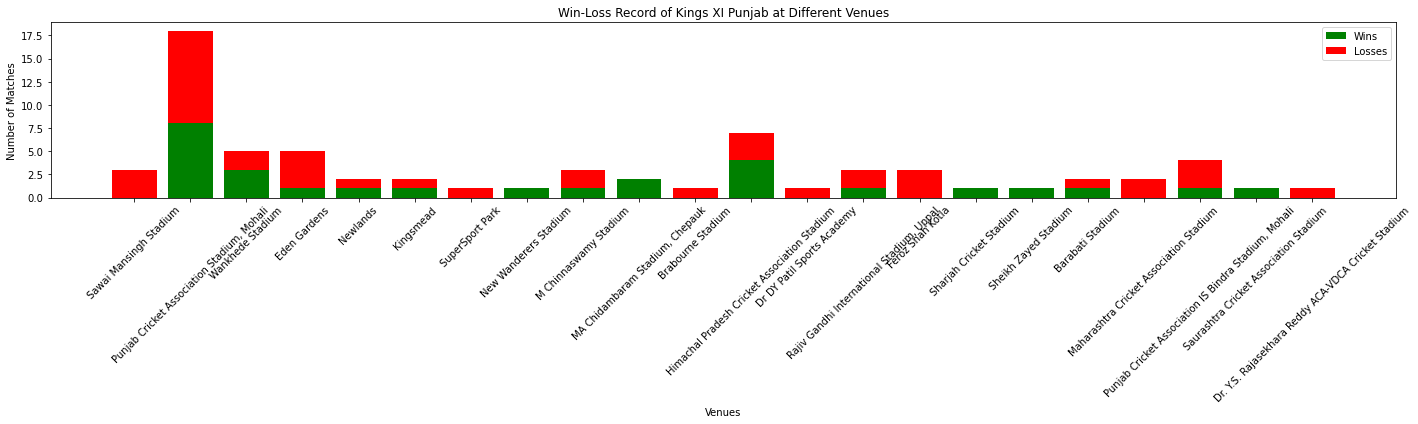

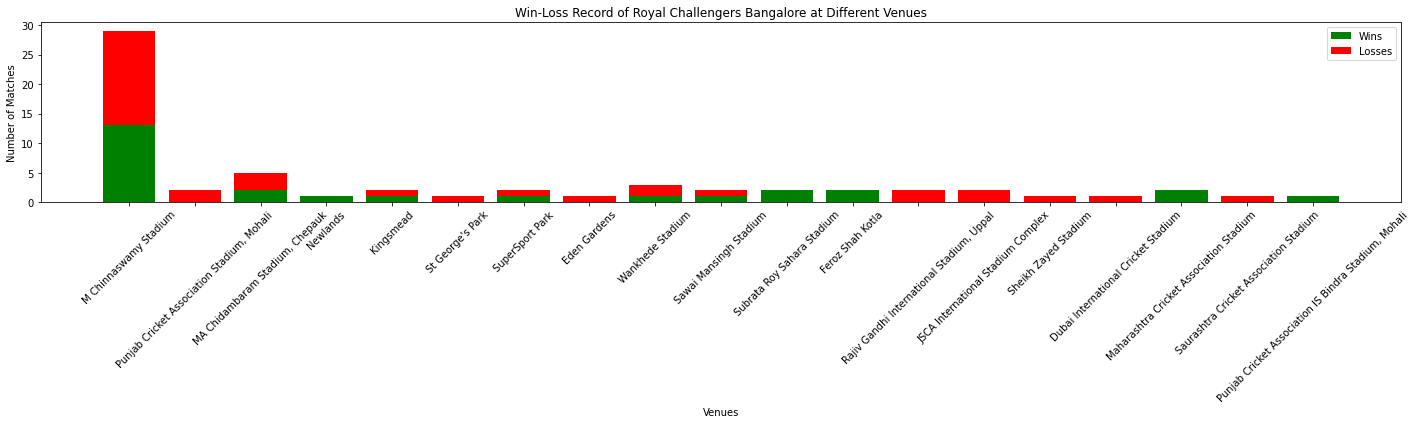

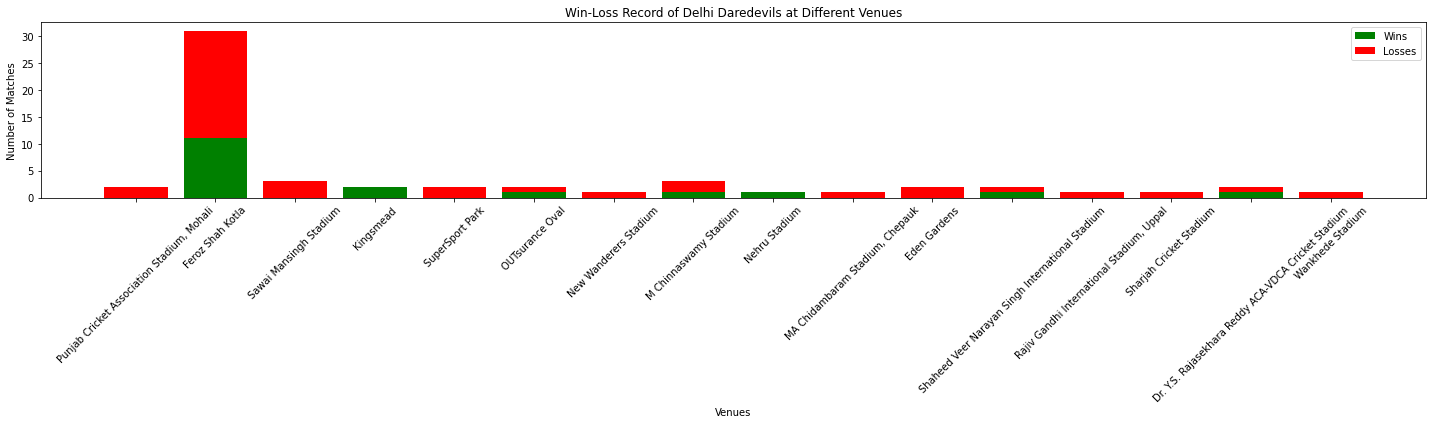

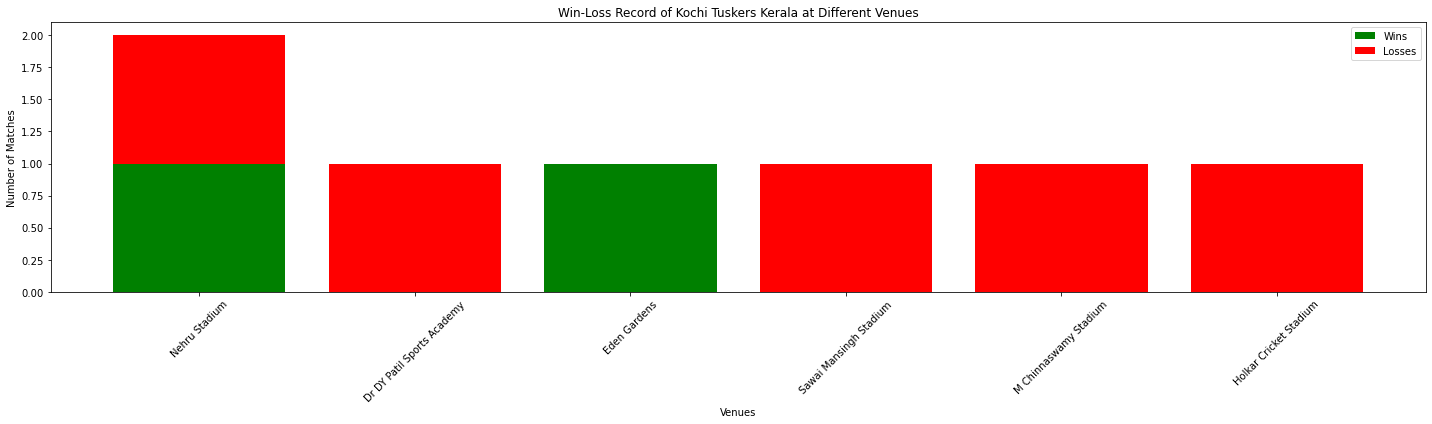

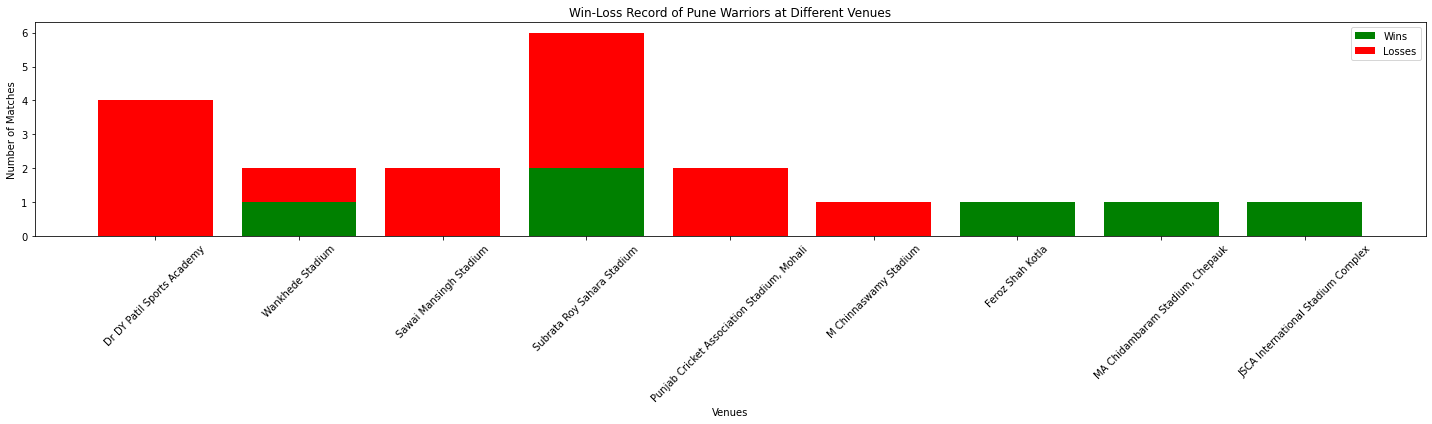

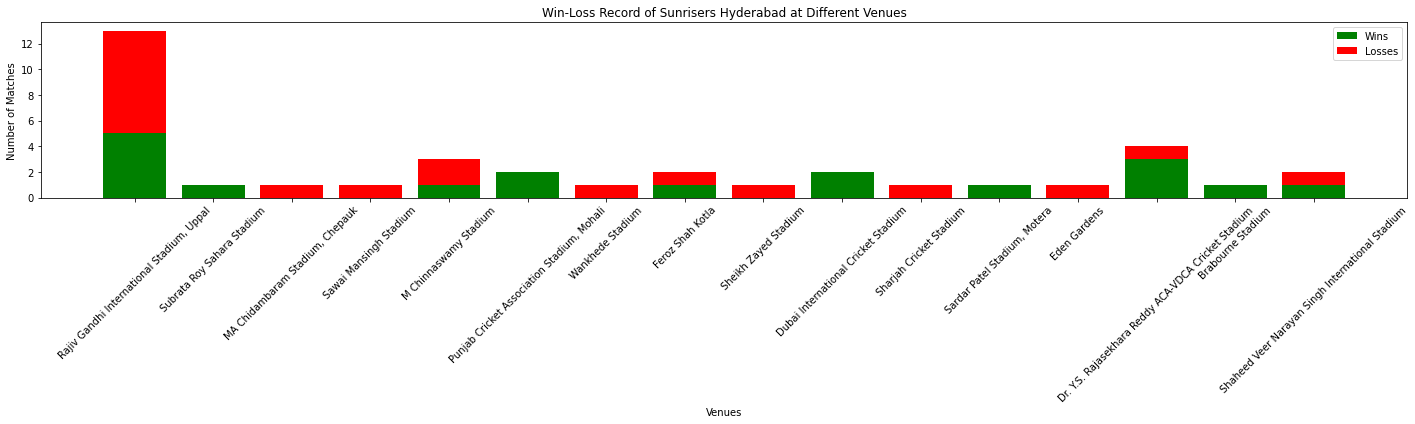

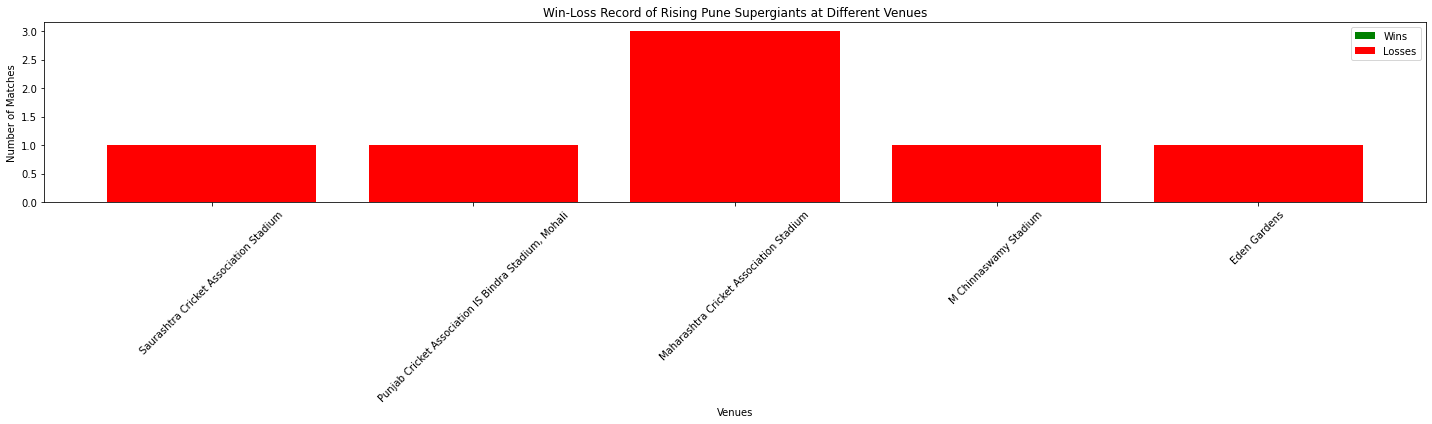

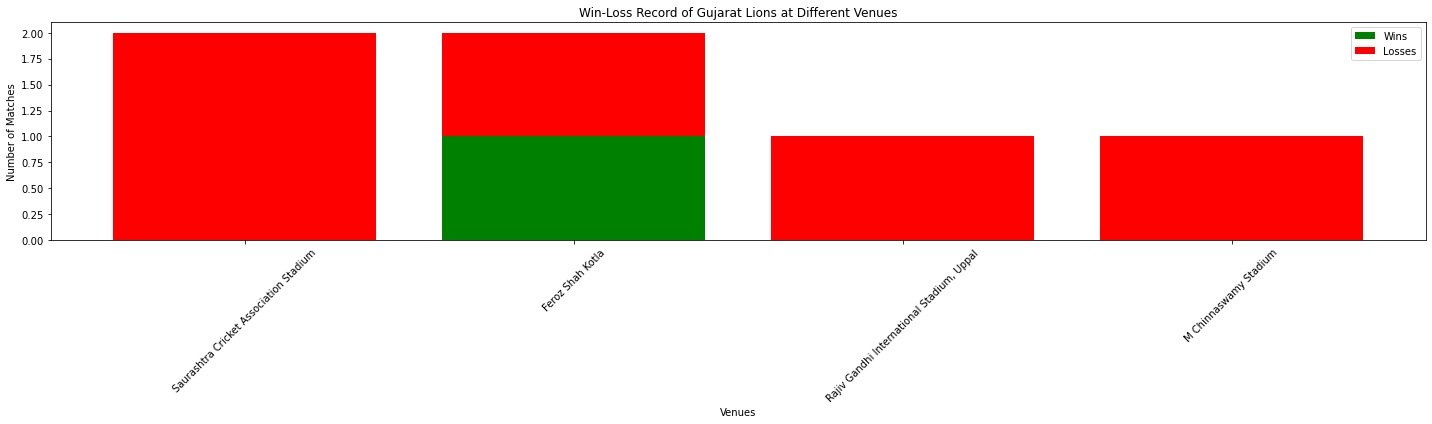

In [43]:
for team, data in win_loss_records.items():
    venues = list(data['venue'].keys())
    wins = [venue['wins'] for venue in data['venue'].values()]
    losses = [venue['losses'] for venue in data['venue'].values()]
    
    plt.figure(figsize=(20, 6))
    plt.bar(venues, wins, label='Wins', color='green')
    plt.bar(venues, losses, bottom=wins, label='Losses', color='red')
    
    plt.xlabel('Venues')
    plt.ylabel('Number of Matches')
    plt.title(f'Win-Loss Record of {team} at Different Venues')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

In [44]:
#TEAM 2:
# Create a dictionary to store win-loss records
win_loss_records = {}

# Iterate through each row in the DataFrame
for index, row in ipl.iterrows():
    venue = row['venue']
    team1 = row['team1']
    team2 = row['team2']
    winner = row['winner']
    
    # Update win-loss records for team2
    if team2 not in win_loss_records:
        win_loss_records[team2] = {'venue': {}, 'total_matches': 0}
    if venue not in win_loss_records[team2]['venue']:
        win_loss_records[team2]['venue'][venue] = {'wins': 0, 'losses': 0}
    if winner == team2:
        win_loss_records[team2]['venue'][venue]['wins'] += 1
    else:
        win_loss_records[team2]['venue'][venue]['losses'] += 1
    win_loss_records[team2]['total_matches'] += 1

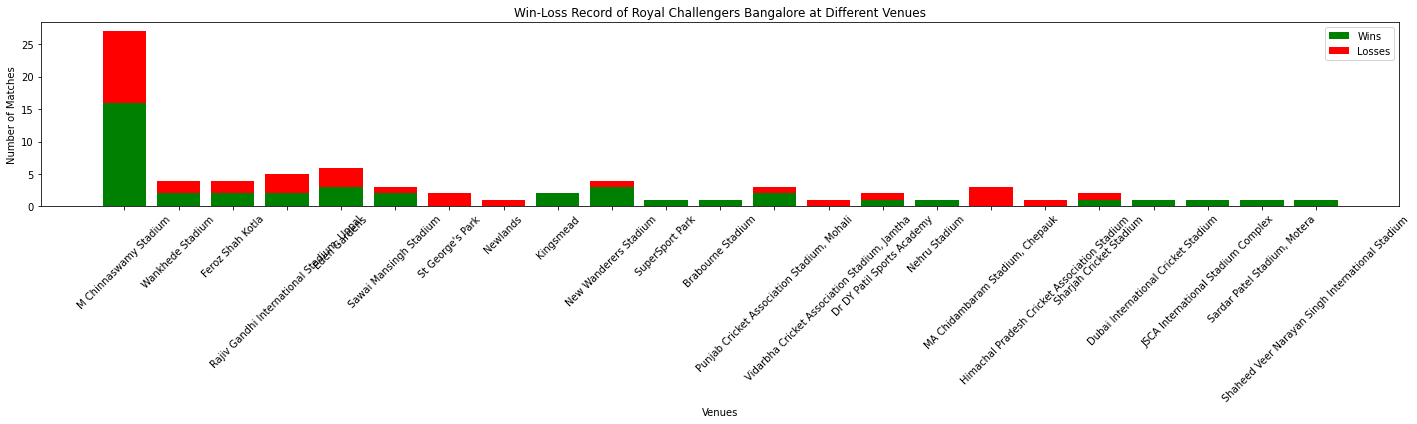

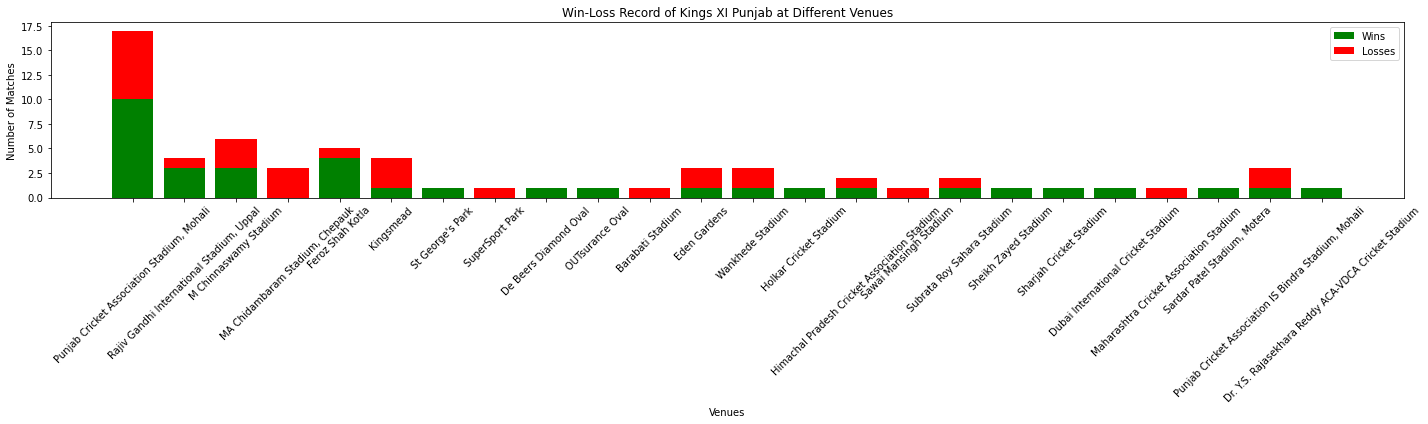

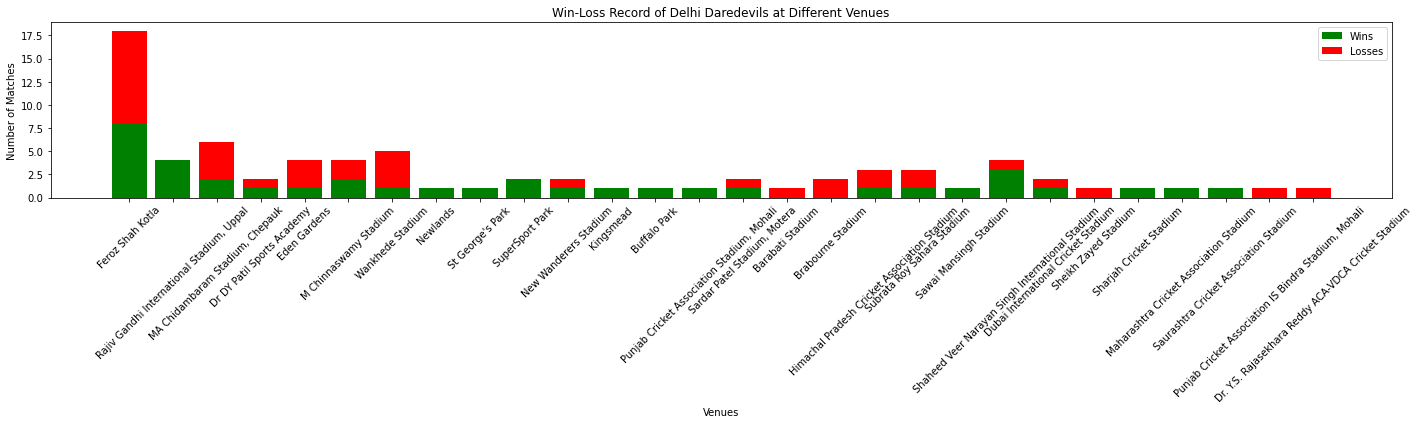

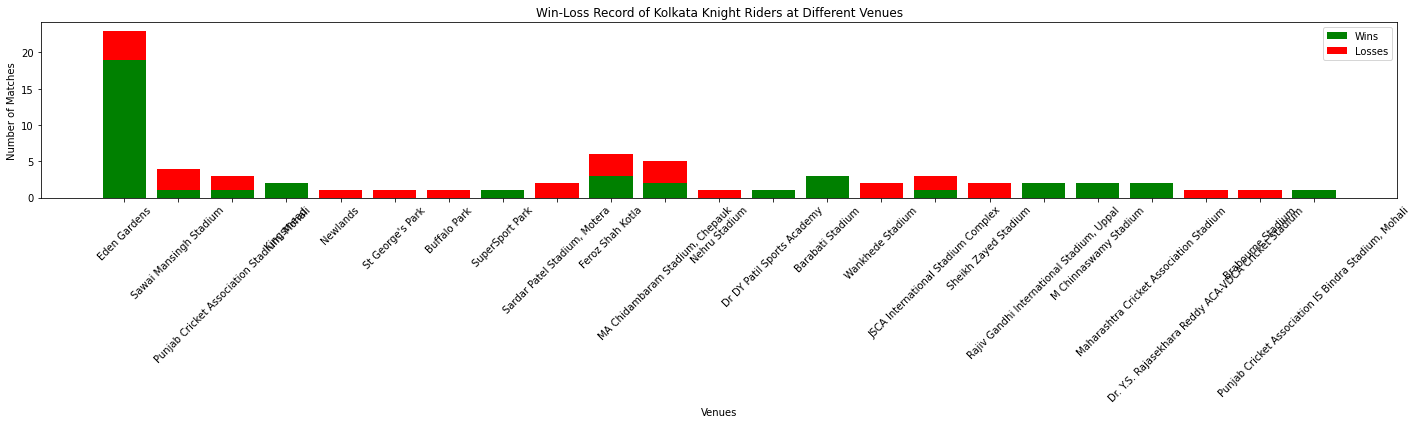

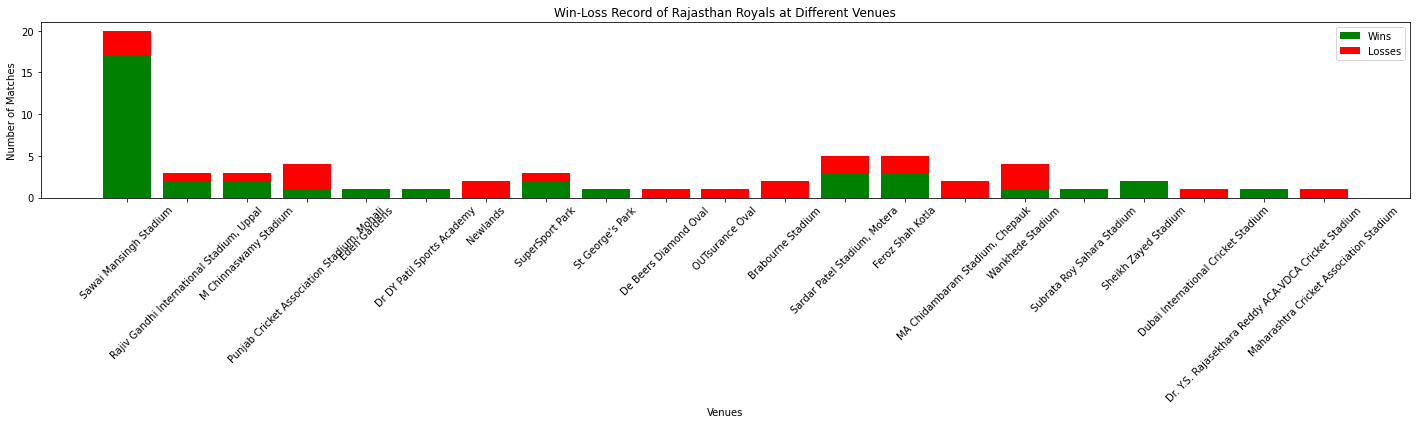

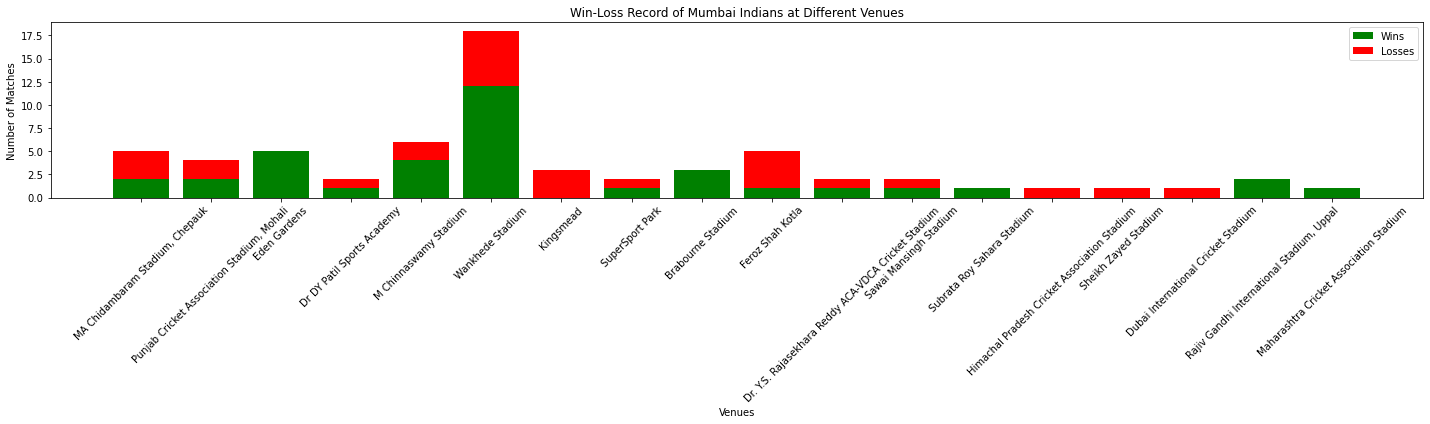

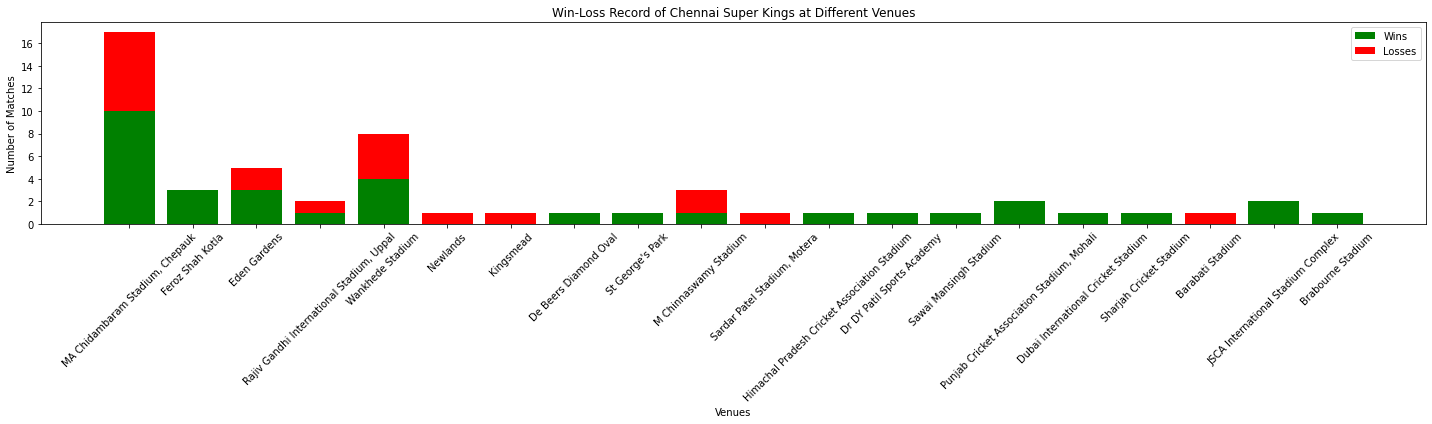

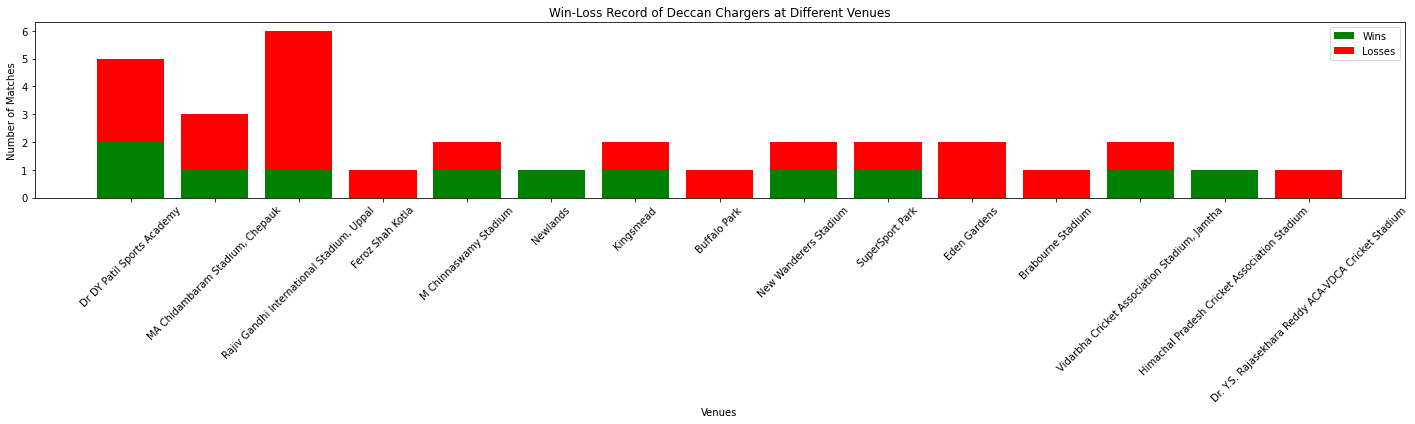

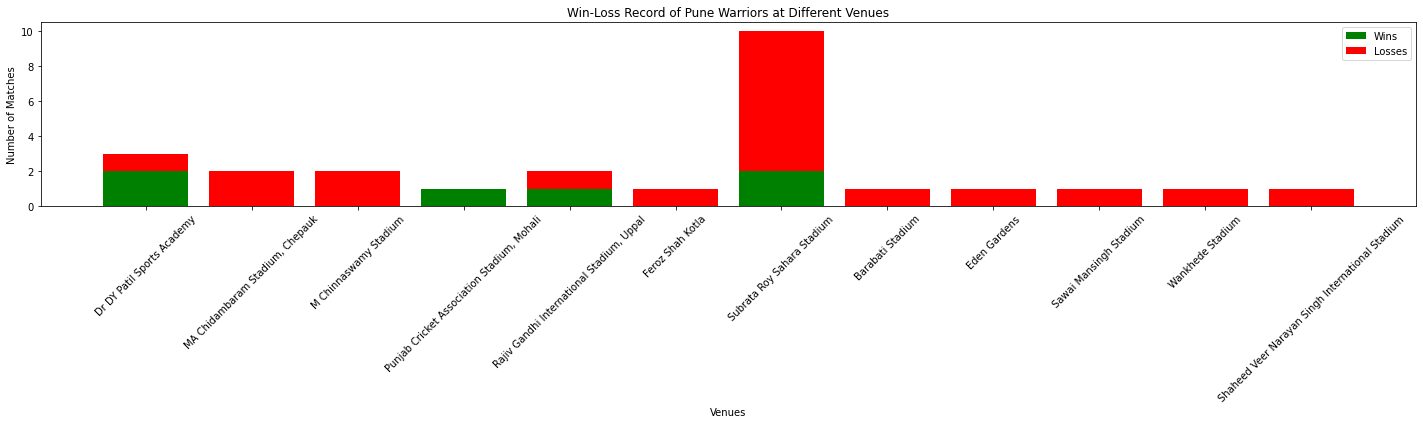

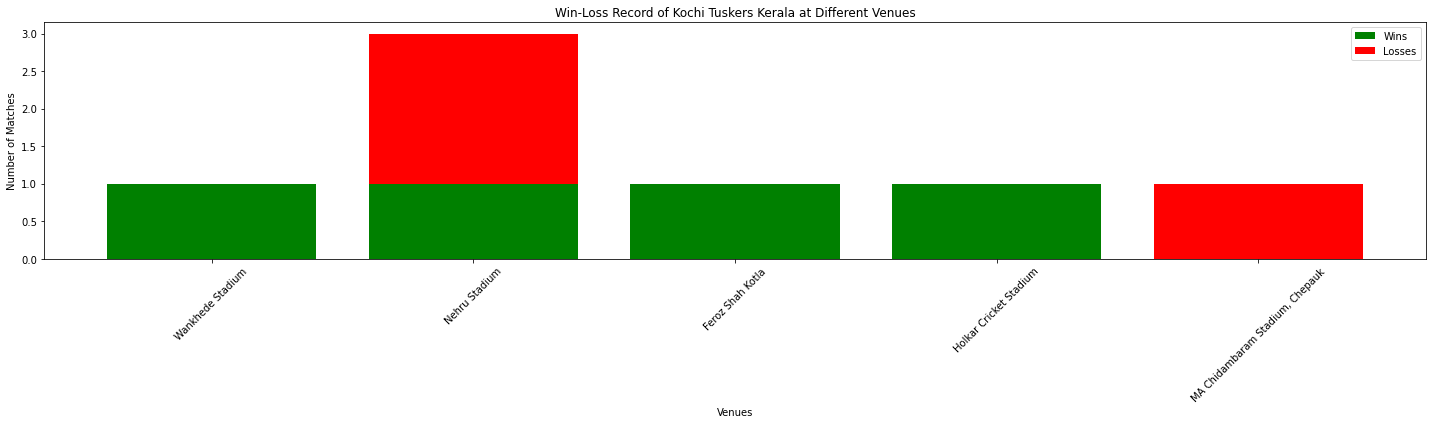

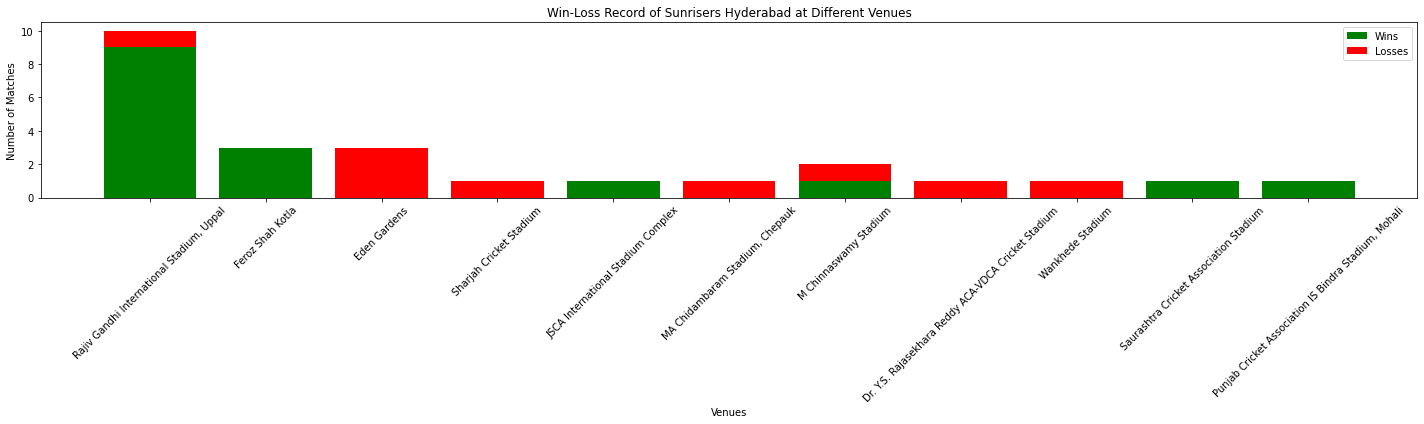

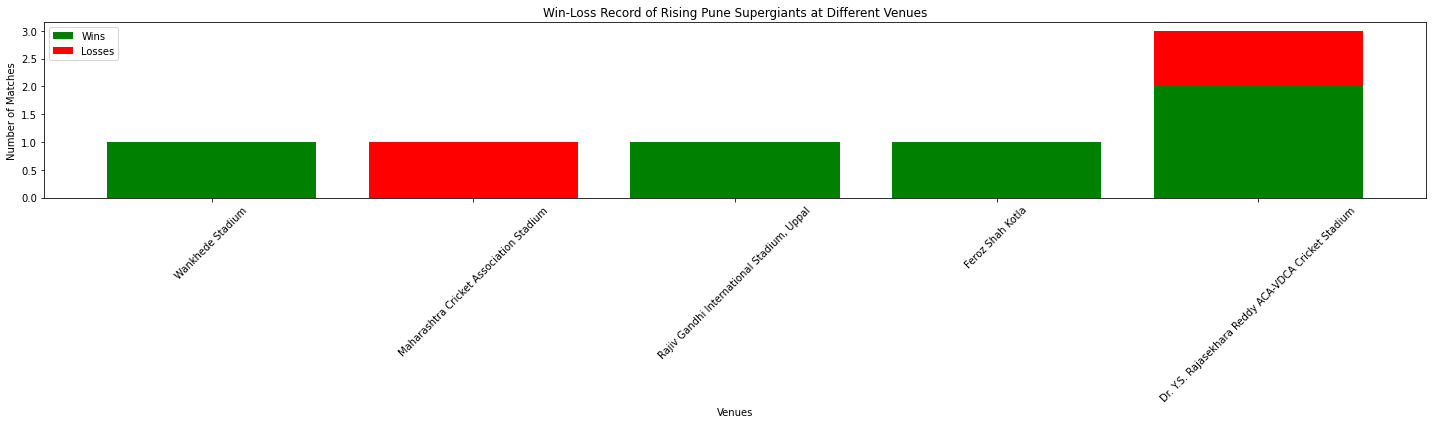

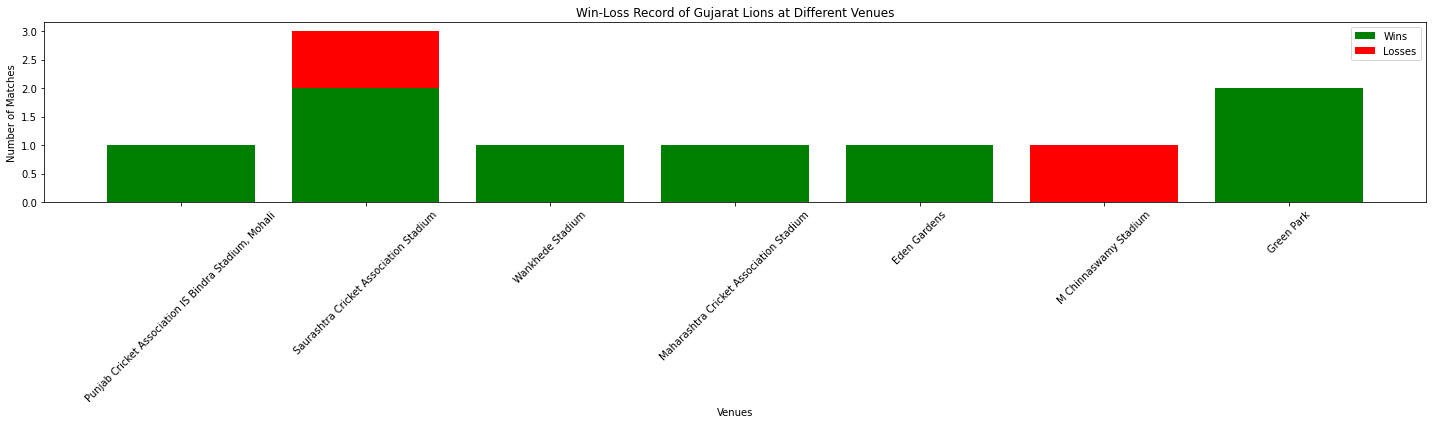

In [45]:
for team, data in win_loss_records.items():
    venues = list(data['venue'].keys())
    wins = [venue['wins'] for venue in data['venue'].values()]
    losses = [venue['losses'] for venue in data['venue'].values()]
    
    plt.figure(figsize=(20, 6))
    plt.bar(venues, wins, label='Wins', color='green')
    plt.bar(venues, losses, bottom=wins, label='Losses', color='red')
    
    plt.xlabel('Venues')
    plt.ylabel('Number of Matches')
    plt.title(f'Win-Loss Record of {team} at Different Venues')
    plt.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()
    
    plt.show()

### 6.3) Identify teams that perform exceptionally well or poorly at specific venues.

In [46]:
# Define a function to identify teams' performance at specific venues
def identify_performance(records, performance_threshold=0.7):
    exceptional_teams = {}
    poor_teams = {}

    for team, data in records.items():
        for venue, record in data['venue'].items():
            total_matches = record['wins'] + record['losses']
            win_percentage = record['wins'] / total_matches

            if win_percentage >= performance_threshold:
                if team not in exceptional_teams:
                    exceptional_teams[team] = []
                exceptional_teams[team].append(venue)
            elif win_percentage <= (1 - performance_threshold):
                if team not in poor_teams:
                    poor_teams[team] = []
                poor_teams[team].append(venue)

    return exceptional_teams, poor_teams

# Identify teams that perform exceptionally well or poorly at specific venues
exceptional_teams, poor_teams = identify_performance(win_loss_records, performance_threshold=0.7)

# Print the results
print("Teams that perform exceptionally well at specific venues:")
for team, venues in exceptional_teams.items():
    print(f"{team}: {', '.join(venues)}")

print("\nTeams that perform poorly at specific venues:")
for team, venues in poor_teams.items():
    print(f"{team}: {', '.join(venues)}")

Teams that perform exceptionally well at specific venues:
Royal Challengers Bangalore: Kingsmead, New Wanderers Stadium, SuperSport Park, Brabourne Stadium, Nehru Stadium, Dubai International Cricket Stadium, JSCA International Stadium Complex, Sardar Patel Stadium, Motera, Shaheed Veer Narayan Singh International Stadium
Kings XI Punjab: Rajiv Gandhi International Stadium, Uppal, Feroz Shah Kotla, St George's Park, De Beers Diamond Oval, OUTsurance Oval, Holkar Cricket Stadium, Sheikh Zayed Stadium, Sharjah Cricket Stadium, Dubai International Cricket Stadium, Sardar Patel Stadium, Motera, Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium
Delhi Daredevils: Rajiv Gandhi International Stadium, Uppal, Newlands, St George's Park, SuperSport Park, Kingsmead, Buffalo Park, Punjab Cricket Association Stadium, Mohali, Sawai Mansingh Stadium, Shaheed Veer Narayan Singh International Stadium, Sharjah Cricket Stadium, Maharashtra Cricket Association Stadium, Saurashtra Cricket Association Stad

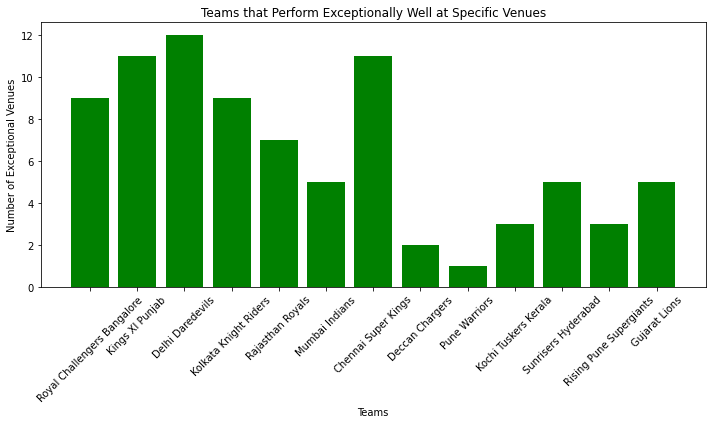

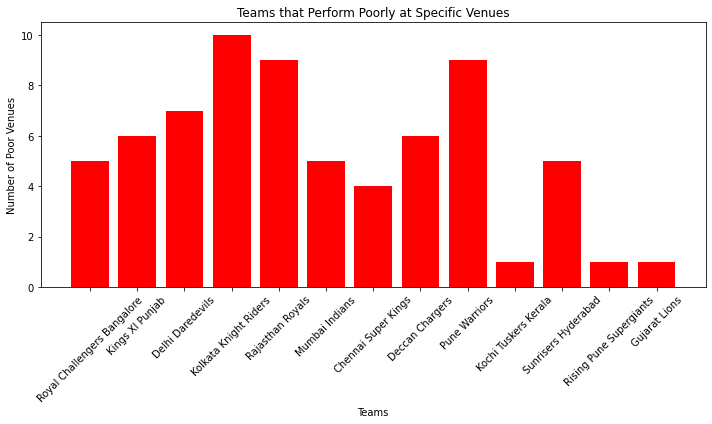

In [47]:
# Visualize teams that perform exceptionally well at specific venues
plt.figure(figsize=(10, 6))
for team, venues in exceptional_teams.items():
    plt.bar(team, len(venues), color='green')

plt.xlabel('Teams')
plt.ylabel('Number of Exceptional Venues')
plt.title('Teams that Perform Exceptionally Well at Specific Venues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualize teams that perform poorly at specific venues
plt.figure(figsize=(10, 6))
for team, venues in poor_teams.items():
    plt.bar(team, len(venues), color='red')

plt.xlabel('Teams')
plt.ylabel('Number of Poor Venues')
plt.title('Teams that Perform Poorly at Specific Venues')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

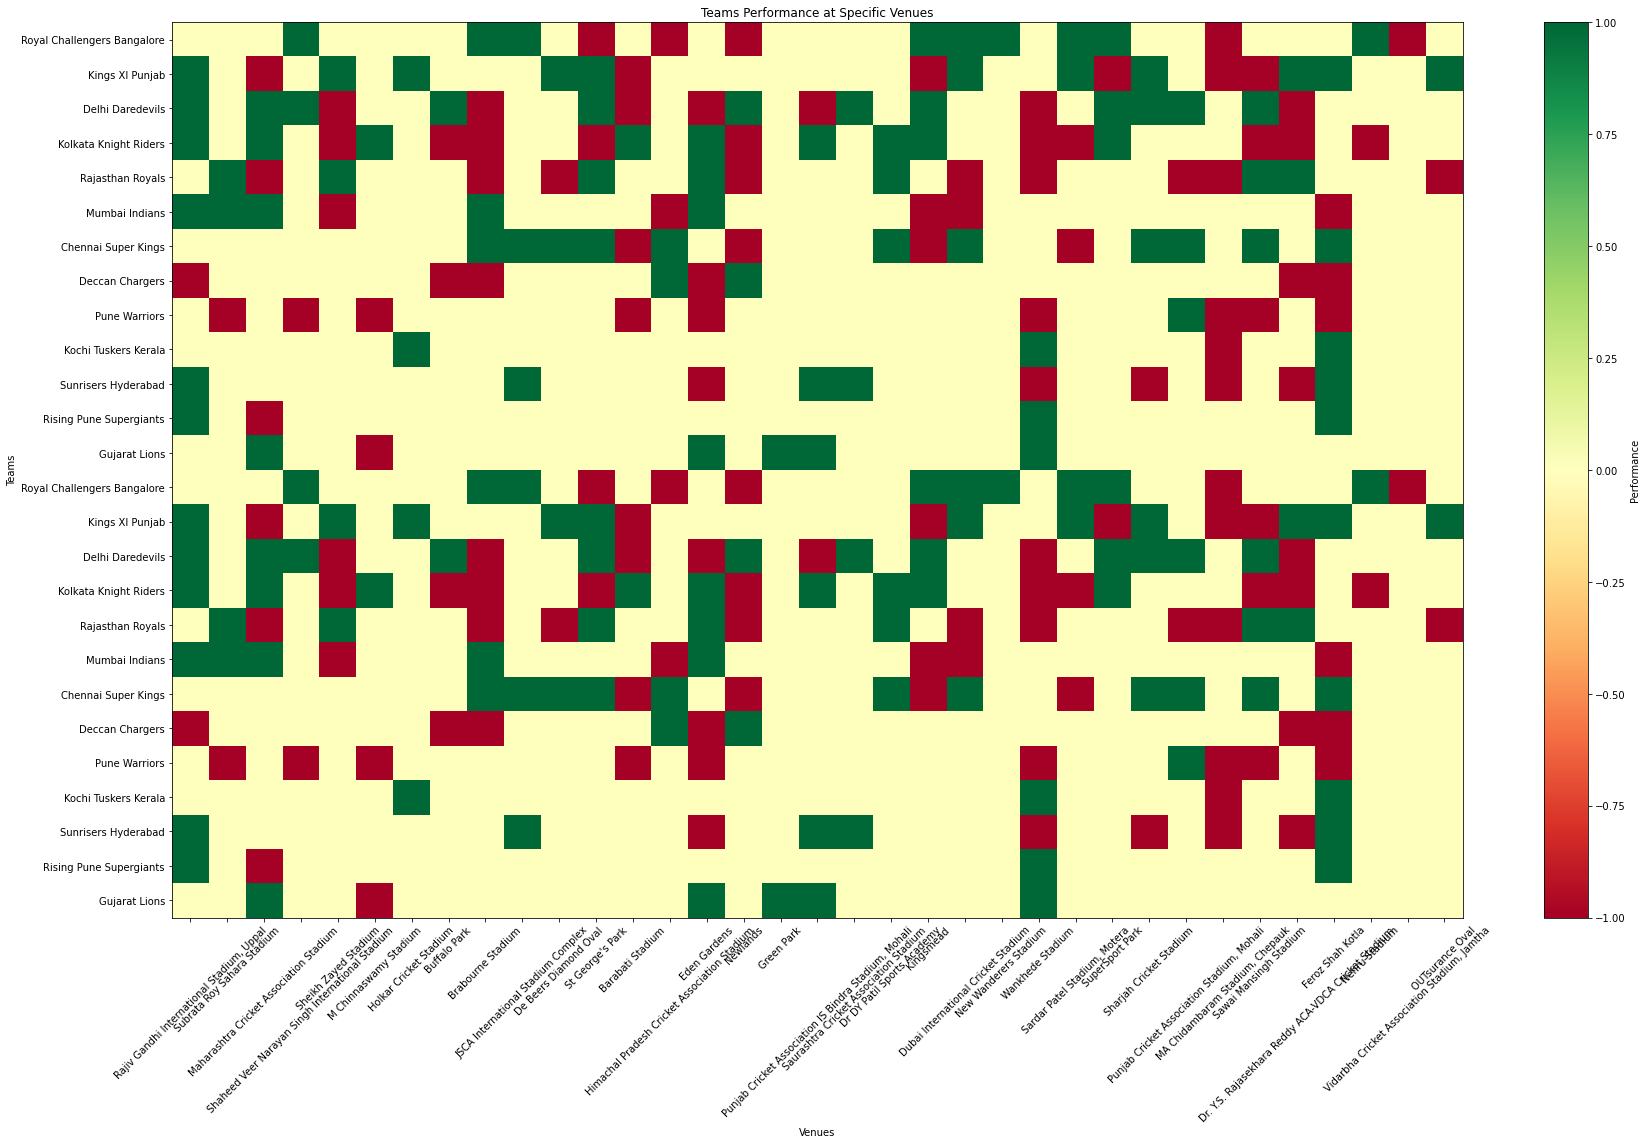

In [48]:
#HeatMap:
# Create a matrix for heatmap visualization
teams = list(exceptional_teams.keys()) + list(poor_teams.keys())
venues = list(set([venue for venues in exceptional_teams.values() for venue in venues] +
                  [venue for venues in poor_teams.values() for venue in venues]))
heatmap_matrix = np.zeros((len(teams), len(venues)))

for i, team in enumerate(teams):
    for j, venue in enumerate(venues):
        if team in exceptional_teams and venue in exceptional_teams[team]:
            heatmap_matrix[i, j] = 1
        elif team in poor_teams and venue in poor_teams[team]:
            heatmap_matrix[i, j] = -1

# Create a heatmap
plt.figure(figsize=(25, 16))
plt.imshow(heatmap_matrix, cmap='RdYlGn', aspect='auto')
plt.xticks(np.arange(len(venues)), venues, rotation=45)
plt.yticks(np.arange(len(teams)), teams)
plt.xlabel('Venues')
plt.ylabel('Teams')
plt.title('Teams Performance at Specific Venues')
plt.colorbar(label='Performance')
plt.tight_layout()
plt.show()